In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import molsysmt as msm
from molsysmt import puw

# File xyznpy

The 'npyxyz' file format is used to store an XYZ object in nanometers with numpy. The file contains two objects in this order: the shape of the XYZ object and the value in nanometers as a rank-3 float numpy array.

In [3]:
molecular_system = np.random.rand(6,4,3) * puw.unit('nm')

In [4]:
msm.convert(molecular_system, to_form='test.xyznpy')

'test.xyznpy'

In [5]:
molecular_system = msm.convert('test.xyznpy', to_form='XYZ')

In [6]:
msm.get_form(molecular_system)

'XYZ'

Behind the scenes, the 'xyznpy' was written and read as follows:

In [7]:
with open('test.xyznpy', 'wb') as fff:
    np.save(fff, molecular_system.shape, allow_pickle=True)
    np.save(fff, puw.get_value(molecular_system, to_unit='nm'), allow_pickle=True)

In [8]:
with open('test.xyznpy', 'rb') as fff:
    shape = np.load(fff)
    molecular_system = np.load(fff)*puw.unit('nm')

In [9]:
molecular_system

Magnitude,[[[0.5022896927985139 0.5469734525571947 0.05324158528104239] [0.886628673327725 0.8609108448315352 0.25137246695187887] [0.8652071479135616 0.08910040328989144 0.4062175396126878] [0.5611632344935878 0.6007661585873174 0.83185214651111]] [[0.14568188286305928 0.5437331989907958 0.2019139068941015] [0.9865657595408973 0.4646217111900339 0.32273758730357405] [0.5186252510322562 0.3590330976550319 0.6563661066952882] [0.817723393164883 0.008655911339574995 0.5310396365762193]] [[0.9506563123180649 0.3093068497324122 0.8728864677220477] [0.7831953001366851 0.4789564573491393 0.6858671976060716] [0.2584331923701071 0.22937560233892362 0.4774966466643058] [0.8922632859886237 0.3189301942360233 0.18390950861194155]] [[0.1468221609031214 0.5451157417450007 0.6221645350363257] [0.47461908331765135 0.40503814958504447 0.41129503727834316] [0.7960919416130754 0.4211137266944929 0.6049745732903132] [0.3250960958700776 0.7991233416083617 0.058571181771066905]] [[0.5837734694562082 0.2266487181733875 0.6132953739976668] [0.24757020759966575 0.10619706062093082 0.8308005585953507] [0.9009034618123322 0.5194487440347408 0.9507854918804538] [0.7156629657236797 0.9736906154396237 0.24790999780105694]] [[0.7758806132675022 0.4898445626005925 0.48582707100205513] [0.29010960738107106 0.17000039650174137 0.7467219259688642] [0.09021858831589735 0.20305381983373172 0.8826027527125215] [0.9537546045267932 0.887640280653609 0.5212319052475114]]]
Units,nanometer


Many methods work with this molecular system form. For example:

In [10]:
msm.info('test.xyznpy')

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_frames
file:xyznpy,4,None,None,None,None,None,6


In [11]:
msm.get('test.xyznpy', target='system', n_frames=True)

6

In [12]:
contact_map = msm.structure.get_contact_map('test.xyznpy', selection='all', threshold='5 angstroms')

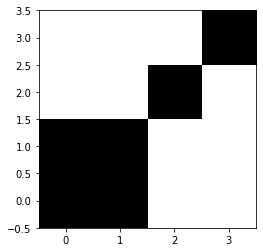

In [13]:
from matplotlib import pyplot as plt
plt.imshow(contact_map[2], cmap='Greys', origin='lower')
plt.show()